In [1]:
# pip install mglearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [3]:
%matplotlib notebook

In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() 

In [5]:
# ①data.keys()でなんのデータ項目があるかを知る

print("Key of iris_dataset: \n{}".format(iris_dataset.keys()))

Key of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [7]:
# ②data['DESCR']でデータの詳細、概要を掴む

print(iris_dataset['DESCR'] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
# ③data['target_names']で予測しようとしている分類(の名前)を調べる

print("Target names: \n{}".format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


In [8]:
# ④data['feature_names']で使用する特徴量を調べる

print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# ⑤data['data']に実際のデータがnumpyの配列形式で入っている

print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [10]:
# data['data'].shape で(データの個数, 特徴量の数)がわかる　それぞれ行と列の数である

print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [11]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5])) #5行まで実際に見てみる

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
# 教師ありの場合、data['target']に配列形式で答えのクラス分類の値が格納されている

print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [13]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [14]:
print("Target:\n{}".format(iris_dataset['target'])) #3種類に分類されている

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
#データセットを並べ替えて分割するtrain_test_splitを使う

from sklearn.model_selection import train_test_split

In [16]:
# train_test_splitは75％を訓練データとし残りの25％をテストデータとして分割する
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [17]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [18]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


<IPython.core.display.Javascript object>


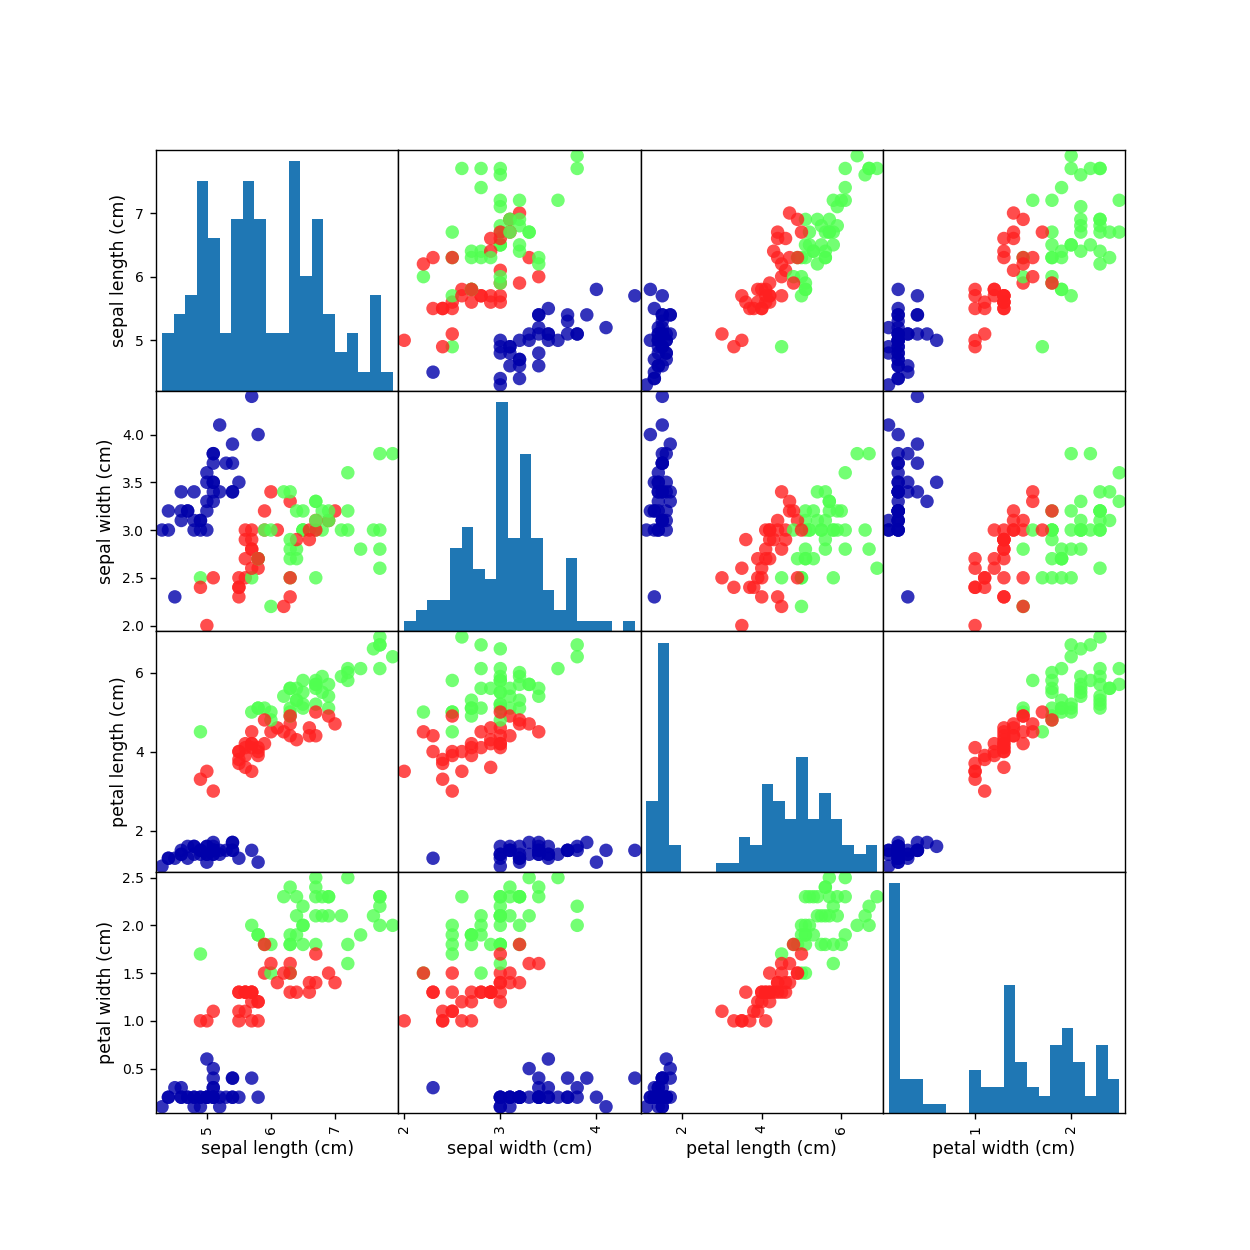

In [21]:
# ①最初にまずデータをよく観察する　散布図pd.scatter_matrixなど



# X_trainのデータからDataFrameを作る
# iris_dataset.feature_namesの文字列を使ってカラムに名前を付ける。
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# データフレームからscatter matrix(散布図)を作成し、y_trainに従って色を付ける。
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [21]:
# ②機械学習モデルの構築

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # k-最近傍法のインスタンスを生成

In [22]:
# ②-1 fitで学習させる

knn.fit(X_train, y_train) #fitは訓練データと教師データを渡してモデルを生成する。返値はオブジェクトそのもの（インスタンスの中身を知れる）

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [24]:
# model.predict(新データ) で予測する

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction])) #予測

Prediction: [0]
Predicted target name: ['setosa']


In [25]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [29]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [30]:
#score関数でもよい

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [31]:

# 一連の流れ


# まずはデータセットの状況を確認する

# ①data.keys()でなんのデータ項目があるかを知る
# ②data['DESCR']でデータの詳細、概要を掴む
# ③data['target_names']で予測しようとしている分類(の名前)を調べる
# ④data['feature_names']で使用する特徴量を調べる
# ⑤data['data']に実際のデータがnumpyの配列形式で入っている
# ⑥data['data'].shape で(データの個数, 特徴量の数)がわかる　それぞれ行と列の数である
# 教師ありの場合、data['target']に配列形式で答えのクラス分類の値が格納されている


# 実際に機械学習を行う
# データセットを並べ替えて分割するtrain_test_splitを使う
# ①最初にまずデータをよく観察する　散布図pd.scatter_matrixなど
# ②機械学習モデルの構築
# ③mode.fit(X_train, y_train)で学習させる
# ④model.predict(new_data) で予測する
# score関数でもよい
# model.score(X_test, y_test)

In [32]:
#以上の手順を必要なもののみで最短で行うと
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
# となる

Test set score: 0.97


In [33]:

#教師あり学習は2種類
# →クラス分類（カテゴリ変数）
# →回帰（連続数）

# 2.3教師あり機械学習アルゴリズム



In [35]:
#forgeというデータセットを使う
mglearn.datasets.make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [36]:
X, y = mglearn.datasets.make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [38]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

<IPython.core.display.Javascript object>


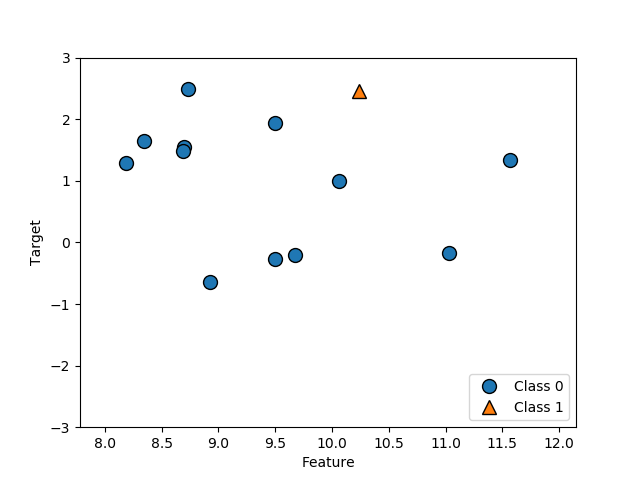

Text(0,0.5,'Second feature')

In [48]:
# データをプロット
%matplotlib notebook
mglearn.discrete_scatter(X[:, 0], X[:, 1],  y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

Text(0,0.5,'Target')

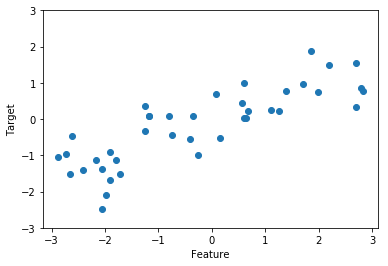

In [50]:
# ブラウザ内に画像を埋め込むための命令です
%matplotlib inline

X, y = mglearn.datasets.make_wave(n_samples=40) # 1つの特徴量と連続値のターゲット変数を持つwaveを用いる
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


In [ ]:
# 上記の簡易データセットではなくまた再び現実のものを用いる

# 乳がんの腫瘍の判別を行う

In [51]:
from sklearn.datasets import  load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [55]:
print("Shape of cnacer data: {}".format(cancer.data.shape))

Shape of cnacer data: (569, 30)


In [56]:
print("Sample counts per class: \n{}".format({
    n: v for n, v in  zip(cancer.target_names, np.bincount(cancer.target))
}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [59]:
# これがどうなっているのかの確認　配列の中身をカウントしたものを配列で返していた
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [60]:
print("Feature names: \n{}".format(cancer.feature_names))
# 特徴量はいっぱいある

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
